<a id=top-page></a>
# `pykitPIV` demo: Generate radial flows

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size="3"><strong>Table of contents:</strong></font>
<br>
<ol>
    <li><a href="#generate-particles">Generate particles</a></li>
    <li><a href="#generate-velocity-field">Generate radial velocity field</a></li>
</ol>
<p></p>
</div>
<br>

***

In [1]:
import numpy as np
import cmcrameri.cm as cmc
from pykitPIV import Particle, FlowField, Motion, Image
from pykitPIV import compute_divergence
import matplotlib.pyplot as plt

2025-05-14 15:46:23.488807: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
save_images = False
n_images = 1
image_size = (300, 300)
size_buffer = 0
origin = 'lower'
figsize = (6,3.5)
filename = None

<a id=generate-particles></a>
***

## Generate particles

[Go to the top](#top-page)

In [3]:
particles = Particle(n_images, 
                     size=image_size, 
                     size_buffer=size_buffer,
                     diameters=(2,4),
                     distances=(1,2),
                     densities=(0.05,0.06),
                     diameter_std=0.5,
                     seeding_mode='random', 
                     random_seed=100)

In [4]:
image = Image(random_seed=100)

In [5]:
image.add_particles(particles)

<a id=generate-velocity-field></a>
***

## Generate radial velocity field

[Go to the top](#top-page)

In [14]:
flowfield = FlowField(n_images,
                      size=image_size,
                      size_buffer=size_buffer,
                      time_separation=2,
                      random_seed=100)

In [15]:
flowfield.generate_radial_velocity_field(source=True,
                                         displacement=(2,2),
                                         imposed_source_location=None, 
                                         sigma=10,
                                         epsilon=1e-6)

In [16]:
image.add_flowfield(flowfield)

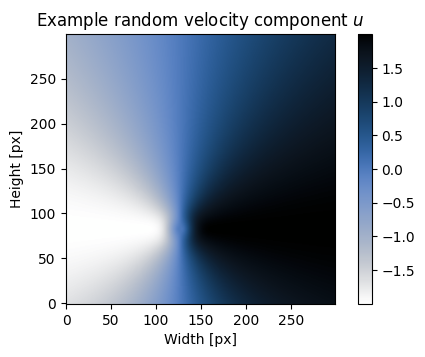

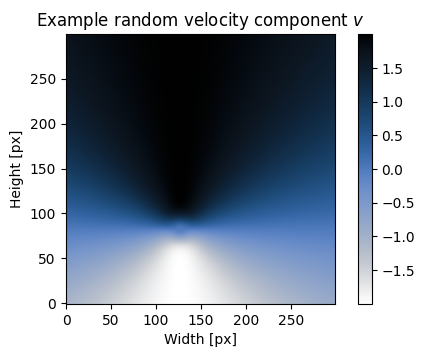

In [17]:
if save_images: filename = 'example-radial-velocity-field.png'
image.plot_field(0,
                 field='velocity',
                 with_buffer=True,
                 xlabel='Width [px]',
                 ylabel='Height [px]',
                 title=('Example random velocity component $u$', 'Example random velocity component $v$'),
                 cmap=cmc.oslo_r,
                 cbar=True,
                 origin=origin,
                 figsize=figsize,
                 filename=filename);

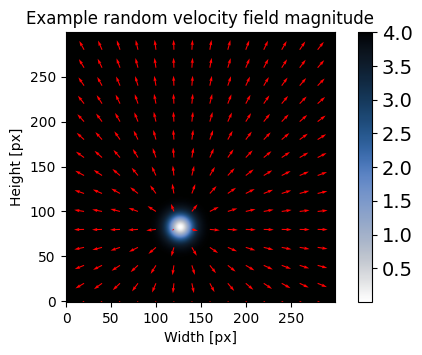

In [18]:
if save_images: filename = 'example-radial-velocity-field-magnitude-quiver.png'
image.plot_field_magnitude(0,
                           field='velocity',
                           with_buffer=True,
                           add_quiver=True,
                           quiver_step=20,
                           quiver_color='r',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

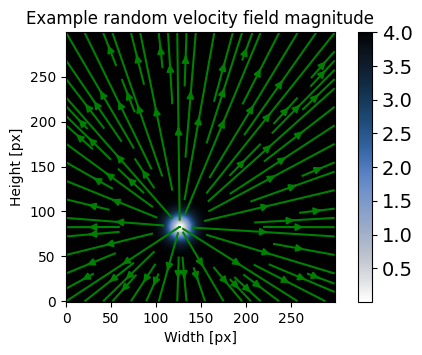

In [19]:
if save_images: filename = 'example-radial-velocity-field-magnitude-streamplot.png'
image.plot_field_magnitude(0,
                           field='velocity',
                           with_buffer=False,
                           add_streamplot=True,
                           streamplot_density=1,
                           streamplot_color='g',
                           xlabel='Width [px]',
                           ylabel='Height [px]',
                           title='Example random velocity field magnitude',
                           cmap=cmc.oslo_r,
                           figsize=figsize,
                           filename=filename);

In [20]:
div = compute_divergence(flowfield.velocity_field)

In [21]:
div.shape

(1, 300, 300)

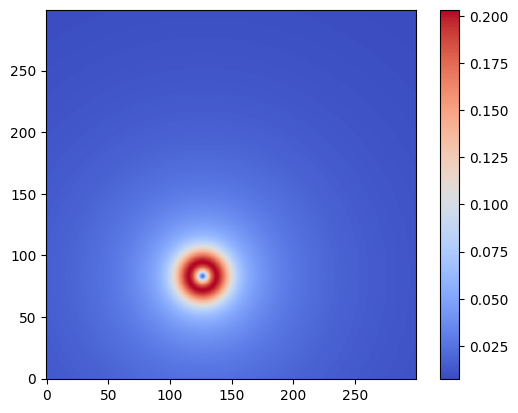

In [22]:
plt.imshow(np.abs(div[0,:,:]), cmap='coolwarm', origin='lower')
plt.colorbar()

***

© K. Zdybał, C. Mucignat, I. Lunati (2025)